In [33]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import sqlite3

In [4]:
connection = sqlite3.connect('sqlite.db')

In [8]:
table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'", 
                                connection)

In [9]:
table_names

,name
0,mapped_plant_quads_co_allrecords_cover
1,mapped_plant_quads_co_allrecords_density
2,mapped_plant_quads_co_daily_climate
3,mapped_plant_quads_co_quad_info
4,mapped_plant_quads_co_quad_inventory
5,mapped_plant_quads_co_quad_stocking_rate
6,mapped_plant_quads_co_species_list
7,mapped_plant_quads_co_species_name_changes


In [13]:
density = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_allrecords_density", connection)

In [12]:
species = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_species_list", connection)

In [41]:
cover = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_allrecords_cover", connection)
climate = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_daily_climate", connection)

In [20]:
merged = pd.merge(left = cover, right = species, how = 'left',left_on = 'species', right_on = 'species')

In [18]:
cover.head()

,quad,year,species,area,x,y
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [19]:
species.head()

,species,density,cover,growthform,longevity
0,Achillea millefolium,2.0,NaN,forb,P
1,Agropyron smithii,4649.0,NaN,grass,P
2,Allium spp.,18.0,NaN,forb,P
3,Allium textile,73.0,NaN,forb,P
4,Ambrosia psilostachya,2.0,NaN,forb,P


In [21]:
merged2 = pd.read_sql_query("""
SELECT * 
FROM
mapped_plant_quads_co_allrecords_cover
LEFT JOIN mapped_plant_quads_co_species_list ON
mapped_plant_quads_co_allrecords_cover.species = mapped_plant_quads_co_species_list.species
""", connection)

In [22]:
merged2.head()

,quad,year,species,area,x,y,species,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,Corner plate,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,Bare ground,10.0,1988.0,Not plant,Not plant
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,Bouteloua gracilis,NaN,47497.0,grass,P
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,Bouteloua gracilis,NaN,47497.0,grass,P
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,Bare ground,10.0,1988.0,Not plant,Not plant


In [23]:
merged.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant


In [25]:
pd.read_sql_query("""
SELECT * FROM mapped_plant_quads_co_species_list WHERE species = 'Allium textile';
""", connection)

,species,density,cover,growthform,longevity
0,Allium textile,73,None,forb,P


In [31]:
merplot = merged.groupby(['species','year'], 
                         as_index = False).cover.sum()
merplotwide = merplot.pivot(index = 'year', columns = 'species', 
                             values = 'cover')

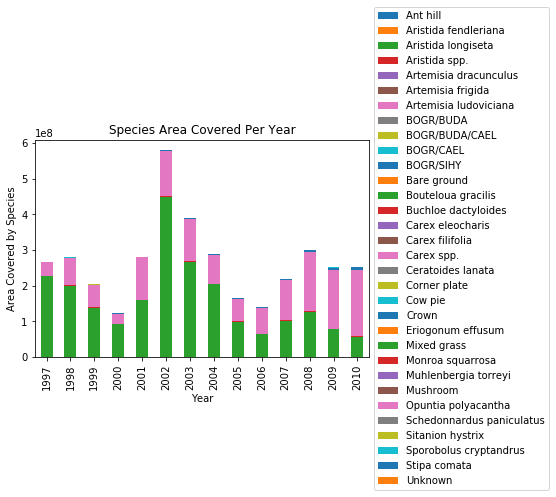

In [35]:
q1 = merplotwide.plot(kind = 'bar', stacked = True, 
                  title = "Species Area Covered Per Year")
q1.set_xlabel("Year")
q1.set_ylabel("Area Covered by Species")
q1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

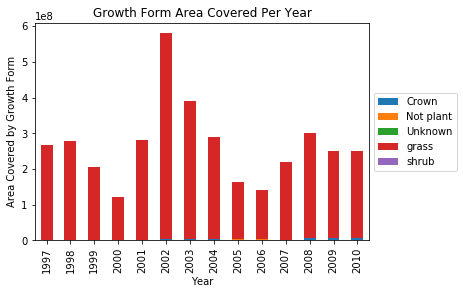

In [40]:
mer2plot = merged.groupby(['growthform','year'], 
                         as_index = False).cover.sum()
mer2plotwide = mer2plot.pivot(index = 'year', columns = 'growthform', 
                             values = 'cover')
q2 = mer2plotwide.plot(kind = 'bar', stacked = True, 
                  title = "Growth Form Area Covered Per Year")
q2.set_xlabel("Year")
q2.set_ylabel("Area Covered by Growth Form")
q2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [47]:
cmerged = pd.merge(left = merged, right = grpclimate, how = 'left',left_on = 'year', right_on = 'year')

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [45]:
grpclimate = climate.groupby('year').precip.mean()

In [57]:
nclimate = grpclimate.to_frame()

In [65]:
nclimate

,precip
year,
1997,1.543701
1998,0.964534
1999,1.649775
2000,0.694447
2001,0.882880
2002,0.559414
2003,0.978355
2004,0.843191
2005,1.303524


In [67]:
nclimate['year'] = range(1997,2011)
nclimate

,precip,year
year,,
1997,1.543701,1997
1998,0.964534,1998
1999,1.649775,1999
2000,0.694447,2000
2001,0.882880,2001
2002,0.559414,2002
2003,0.978355,2003
2004,0.843191,2004
2005,1.303524,2005


In [69]:
cmerged = pd.merge(left = merged, right = nclimate, how = 'left',left_on = 'year', right_on = 'year')

In [106]:
cmerged.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity,precip
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant,1.543701
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant,1.543701
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P,1.543701
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P,1.543701
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant,1.543701


In [108]:
mer3plot = cmerged.groupby(['growthform','precip'], 
                         as_index = False).cover.sum()

0         1.543701
1         1.543701
2         1.543701
3         1.543701
4         1.543701
5         1.543701
6         1.543701
7         1.543701
8         1.543701
9         1.543701
10        1.543701
11        1.543701
12        1.543701
13        1.543701
14        1.543701
15        1.543701
16        1.543701
17        1.543701
18        1.543701
19        1.543701
20        1.543701
21        1.543701
22        1.543701
23        1.543701
24        1.543701
25        1.543701
26        1.543701
27        1.543701
28        1.543701
29        1.543701
            ...   
105125    3.071114
105126    3.071114
105127    3.071114
105128    3.071114
105129    3.071114
105130    3.071114
105131    3.071114
105132    3.071114
105133    3.071114
105134    3.071114
105135    3.071114
105136    3.071114
105137    3.071114
105138    3.071114
105139    3.071114
105140    3.071114
105141    3.071114
105142    3.071114
105143    3.071114
105144    3.071114
105145    3.071114
105146    3.

In [109]:
mer3plotwide = mer3plot.pivot(index = 'precip', columns = 'growthform', 
                             values = 'cover')

In [110]:
mer3plotwide.head()

growthform,Crown,Not plant,Unknown,grass,shrub
precip,,,,,
0.559414,2987530.0,266664.0,NaN,576893407.0,10211.0
0.694447,1133860.0,142025.0,12.0,121094287.0,17284.0
0.843191,2923830.0,570039.0,NaN,285806034.0,1285.0
0.882880,1579760.0,285933.0,36.0,279643557.0,29080.0
0.964534,1739010.0,429021.0,NaN,277064938.0,24585.0


KeyError: 'precip'

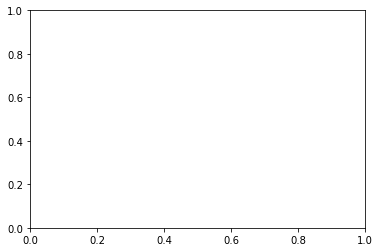

In [116]:
mer3plotwide.plot.scatter('precip','Crown')

In [117]:
test = mer3plotwide.cumsum()

In [118]:
test.head()

growthform,Crown,Not plant,Unknown,grass,shrub
precip,,,,,
0.559414,2987530.0,266664.0,NaN,5.768934e+08,10211.0
0.694447,4121390.0,408689.0,12.0,6.979877e+08,27495.0
0.843191,7045220.0,978728.0,NaN,9.837937e+08,28780.0
0.882880,8624980.0,1264661.0,48.0,1.263437e+09,57860.0
0.964534,10363990.0,1693682.0,NaN,1.540502e+09,82445.0


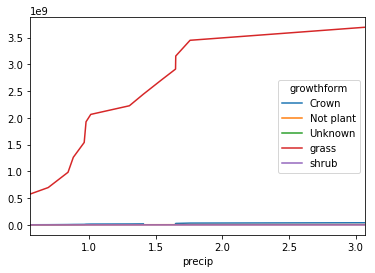

In [125]:
test.plot()

In [126]:
merplotwide

species,Ant hill,Aristida fendleriana,Aristida longiseta,Aristida spp.,Artemisia dracunculus,Artemisia frigida,Artemisia ludoviciana,BOGR/BUDA,BOGR/BUDA/CAEL,BOGR/CAEL,...,Mixed grass,Monroa squarrosa,Muhlenbergia torreyi,Mushroom,Opuntia polyacantha,Schedonnardus paniculatus,Sitanion hystrix,Sporobolus cryptandrus,Stipa comata,Unknown
year,,,,,,,,,,,,,,,,,,,,,
1997,NaN,NaN,15281.0,NaN,NaN,16441.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,66432.0,359513.0,176880.0,60.0
1998,130.0,NaN,17759.0,NaN,NaN,24461.0,NaN,72.0,NaN,NaN,...,NaN,NaN,736.0,NaN,NaN,3525.0,121792.0,339416.0,184250.0,NaN
1999,208.0,NaN,17759.0,5.0,1.0,22055.0,NaN,NaN,NaN,NaN,...,NaN,NaN,828.0,NaN,NaN,5922.0,77504.0,430969.0,110550.0,NaN
2000,130.0,NaN,2891.0,10.0,NaN,17243.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,846.0,52592.0,107184.0,206360.0,12.0
2001,130.0,NaN,33866.0,NaN,NaN,28872.0,NaN,NaN,NaN,NaN,...,NaN,NaN,46.0,2.0,NaN,3666.0,103108.0,252329.0,145926.0,36.0
2002,52.0,NaN,23954.0,NaN,NaN,10025.0,NaN,NaN,NaN,NaN,...,NaN,NaN,184.0,2.0,NaN,NaN,35984.0,238931.0,45694.0,NaN
2003,NaN,1.0,20237.0,NaN,NaN,6416.0,NaN,2160.0,NaN,NaN,...,NaN,NaN,184.0,NaN,1.0,NaN,15916.0,363979.0,204886.0,36.0
2004,NaN,NaN,10738.0,10.0,NaN,1203.0,NaN,288.0,NaN,NaN,...,NaN,NaN,46.0,NaN,NaN,1551.0,1384.0,22330.0,135608.0,NaN
2005,NaN,NaN,8673.0,NaN,NaN,2807.0,NaN,2232.0,121.0,1681.0,...,NaN,NaN,92.0,NaN,NaN,NaN,1384.0,245630.0,79596.0,NaN


In [130]:
merplotwide.max()

species
Ant hill                           208.0
Aristida fendleriana                 1.0
Aristida longiseta               33866.0
Aristida spp.                       10.0
Artemisia dracunculus                1.0
Artemisia frigida                28872.0
Artemisia ludoviciana                4.0
BOGR/BUDA                         2232.0
BOGR/BUDA/CAEL                     121.0
BOGR/CAEL                         1681.0
BOGR/SIHY                            4.0
Bare ground                     530796.0
Bouteloua gracilis           449084135.0
Buchloe dactyloides            2645361.0
Carex eleocharis                 95310.0
Carex filifolia                    990.0
Carex spp.                   184948525.0
Ceratoides lanata                  126.0
Corner plate                    132498.0
Cow pie                            138.0
Crown                          6541990.0
Eriogonum effusum                  205.0
Mixed grass                         81.0
Monroa squarrosa                     1.0
Muhlenbe